# Cats and Dogs

In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import cv2
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from sklearn.model_selection import train_test_split

rows = 128
cols= 128

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory
import os, shutil
# print(os.listdir("../input"))

In [6]:
source_data_dir = "../dogs_and_cats/train"
try:
    os.mkdir("../dogs_and_cats//training_set/cats")
    os.mkdir("../dogs_and_cats//training_set/dogs")
    os.mkdir("../dogs_and_cats//validation_set/cats")
    os.mkdir("../dogs_and_cats//validation_set/dogs")
except:
    pass

In [7]:
# if os.listdir("../dogs_and_cats/training_set/cats")=="":
#     # If the folder contains no pictures start copying
#     for file in ["cat.{}.jpg".format(i) for i in range (2000)]:
#         shutil.copyfile(os.path.join(source_data_dir, file), os.path.join("../dogs_and_cats/training_set/cats", file))
#     for file in ["dog.{}.jpg".format(i) for i in range (2000)]:
#         shutil.copyfile(os.path.join(source_data_dir, file), os.path.join("../dogs_and_cats/training_set/dogs", file))
#     for file in ["cat.{}.jpg".format(i) for i in range (2000, 2500)]:
#         shutil.copyfile(os.path.join(source_data_dir, file), os.path.join("../dogs_and_cats/validation_set/cats", file))
#     for file in ["dog.{}.jpg".format(i) for i in range (2000, 2500)]:
#         shutil.copyfile(os.path.join(source_data_dir, file), os.path.join("../dogs_and_cats/validation_set/dogs", file))

# Data Pre-processing

In [8]:
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from keras import models

model = models.Sequential()
model.add(Conv2D(32, (3,3), activation='relu', input_shape=(rows, cols, 3)))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

2024-05-20 10:55:26.177531: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 63, 63, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 30, 30, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 28, 28, 64)        36928     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 14, 14, 64)        0

In [12]:
from keras import optimizers
model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(learning_rate=1e-4),
              metrics=['acc'])

In [24]:
from keras.preprocessing.image import ImageDataGenerator

x_train_datagen = ImageDataGenerator(rescale=1./255)
x_val_datagen = ImageDataGenerator(rescale=1./255)

train_datagen = x_train_datagen.flow_from_directory("../dogs_and_cats/train",
                                                    target_size=(rows,cols),
                                                    batch_size=40,
                                                    class_mode='binary')
val_datagen = x_val_datagen.flow_from_directory("../dogs_and_cats/validation",
                                                target_size=(rows,cols),
                                                batch_size=40,
                                                class_mode='binary')

Found 800 images belonging to 2 classes.
Found 300 images belonging to 2 classes.


In [30]:
800 // 40 #

20

In [31]:
epochs = 30

# steps_per_epoch = samples / batch_size

H = model.fit(train_datagen,
                    steps_per_epoch=20, 
                    epochs=epochs,
                    validation_data=val_datagen)

Epoch 1/30
20/20 [==============================] - 10s 508ms/step - loss: 0.6589 - acc: 0.6075 - val_loss: 0.6652 - val_acc: 0.6633
Epoch 2/30
20/20 [==============================] - 11s 559ms/step - loss: 0.6450 - acc: 0.6500 - val_loss: 0.6574 - val_acc: 0.6500
Epoch 3/30
20/20 [==============================] - 10s 516ms/step - loss: 0.6326 - acc: 0.6513 - val_loss: 0.6517 - val_acc: 0.6533
Epoch 4/30
20/20 [==============================] - 10s 486ms/step - loss: 0.6163 - acc: 0.6762 - val_loss: 0.7710 - val_acc: 0.5067
Epoch 5/30
20/20 [==============================] - 9s 471ms/step - loss: 0.5896 - acc: 0.7100 - val_loss: 0.6448 - val_acc: 0.6233
Epoch 6/30
20/20 [==============================] - 9s 468ms/step - loss: 0.5841 - acc: 0.6938 - val_loss: 0.6600 - val_acc: 0.6233
Epoch 7/30
20/20 [==============================] - 10s 476ms/step - loss: 0.5656 - acc: 0.7125 - val_loss: 0.7487 - val_acc: 0.5467
Epoch 8/30
20/20 [==============================] - 10s 473ms/step - lo

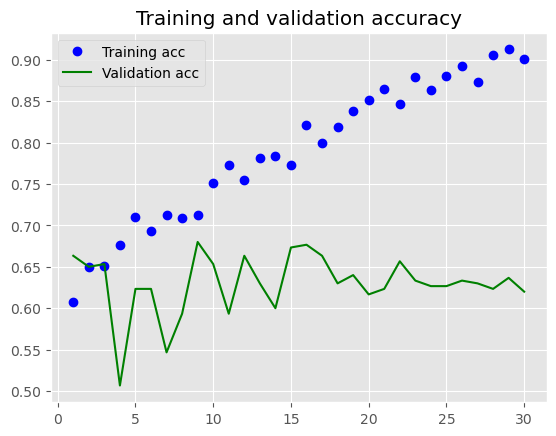

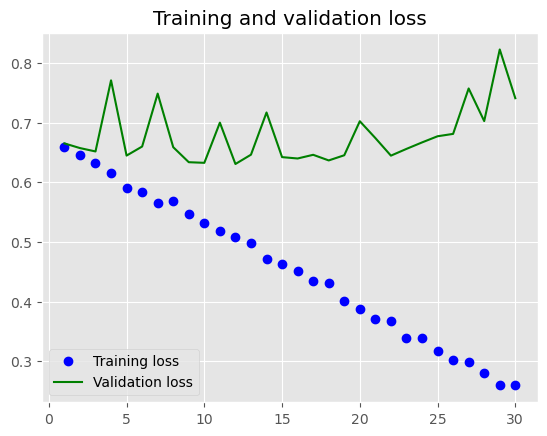

In [32]:
acc = H.history['acc']
val_acc = H.history['val_acc']
loss = H.history['loss']
val_loss = H.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'g', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'g', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [33]:
model.save('../dogs_and_cats/cats_and_dogs.h5')  # creates a HDF5 file

/opt/miniconda3/envs/ml_python_2019/lib/python3.9/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


References:

1. [Anthony Tanbakuchi](http://tanbakuchi.com/posts/comparison-of-openv-interpolation-algorithms/ )

2. https://elitedatascience.com/keras-tutorial-deep-learning-in-python

3. https://keras.io/applications/





